In [84]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import cv2

from glob import glob
import os

In [86]:
# ! unzip captcha-samples-wordpress.zip > /dev/null

In [87]:
im = cv2.imread('train/22PL.png')
im.shape

(24, 72, 3)

In [88]:
im = 255 - cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)/255   # تبدیل مود رنگ
im.shape

(24, 72)

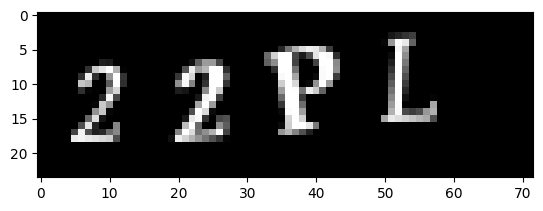

In [89]:
plt.imshow(im,'gray')

In [90]:
def load_data(p):
    pattern = os.path.join(p,'*.png')
    files = glob(pattern)
    X = []
    Y = []
    for file in files:
        chars = list(os.path.splitext(os.path.basename(file))[0])
        if len(chars) != 4:
            print(chars)
            continue
        im = cv2.imread(file)
        im = (255 - cv2.cvtColor(im,cv2.COLOR_RGB2GRAY))/255  
        X.append(im)
        # Y.append(os.path.basename(file)[:-4])
        Y.append(chars)
    X = np.array(X,ndmin=3)
    Y = np.array(Y,ndmin=2)
    return X,Y

In [91]:
x_train,y_train = load_data('train/')
x_test,y_test = load_data('test/')

['A', 'Z', 'Q', 'K', '(', '1', ')']


In [92]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9843, 24, 72) (9843, 4)
(100, 24, 72) (100, 4)


In [93]:
encoder = LabelEncoder()
encoder.fit(y_train.reshape(-1))
encoder.classes_
with open('encoder.bin','wb')as f:
    pickle.dump(encoder,f)

In [94]:
y_encoded_train = encoder.transform(y_train.reshape(-1)).reshape(-1,4)
y_encoded_test = encoder.transform(y_test.reshape(-1)).reshape(-1,4)
print(y_encoded_train.shape)

(9843, 4)


In [95]:
yt = to_categorical(y_encoded_train[:,0])
yt_test = to_categorical(y_encoded_test[:,0])
print(yt.shape)

(9843, 32)


In [96]:
print(x_train.shape)

(9843, 24, 72)


In [97]:
model = Sequential()

model.add(Input(shape=(24, 72,1)))
# feature Learning
model.add(Conv2D(4,(3,3),padding='same'))  # (3,3) عکس کوچیک
model.add(Conv2D(8,(3,3),padding='same'))  
model.add(Conv2D(16,(3,3),padding='same'))  
# model.add(Conv2D(32,(3,3),padding='same'))  
# classification
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 24, 72, 4)         40        
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 72, 8)         296       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 72, 16)        1168      
                                                                 
 flatten_5 (Flatten)         (None, 27648)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               3539072   
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)               

In [98]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
h = model.fit(x_train,yt,validation_data=(x_test,yt_test),epochs=20)

Epoch 1/20
308/308 [==============================] - 12s 34ms/step - loss: 2.2332 - accuracy: 0.3389 - val_loss: 1.1790 - val_accuracy: 0.6500
Epoch 2/20
308/308 [==============================] - 6s 20ms/step - loss: 0.6528 - accuracy: 0.7764 - val_loss: 0.7402 - val_accuracy: 0.7600
Epoch 3/20
308/308 [==============================] - 6s 19ms/step - loss: 0.2889 - accuracy: 0.9045 - val_loss: 0.4561 - val_accuracy: 0.8700
Epoch 4/20
308/308 [==============================] - 6s 19ms/step - loss: 0.1704 - accuracy: 0.9403 - val_loss: 0.1278 - val_accuracy: 0.9600
Epoch 5/20
308/308 [==============================] - 7s 24ms/step - loss: 0.1099 - accuracy: 0.9624 - val_loss: 0.2698 - val_accuracy: 0.9100
Epoch 6/20
308/308 [==============================] - 8s 25ms/step - loss: 0.0807 - accuracy: 0.9739 - val_loss: 0.3061 - val_accuracy: 0.9300
Epoch 7/20
308/308 [==============================] - 7s 22ms/step - loss: 0.1018 - accuracy: 0.9639 - val_loss: 0.2198 - val_accuracy: 0.930

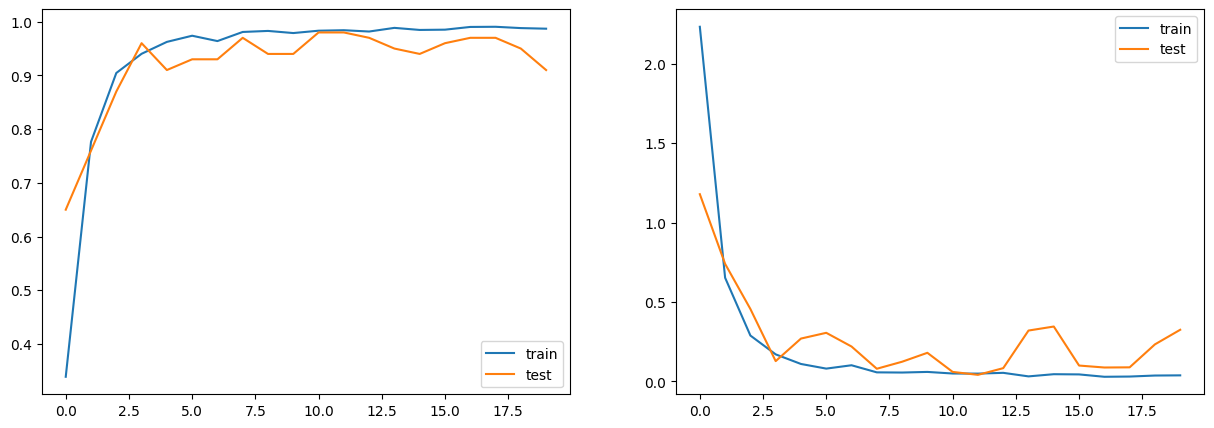

In [100]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['train', 'test'])


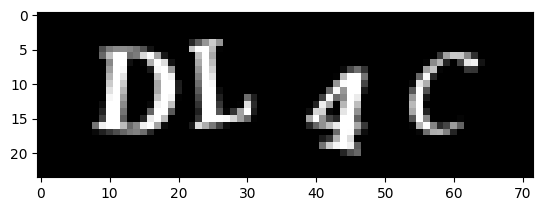

In [102]:
f = 'test/DL4C.png'
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = (255-im)/255
plt.imshow(im,'gray');

In [103]:
r = model.predict(im.reshape(1,24,72,1))
r

1/1 [==============================] - 1s 592ms/step


array([[1.18345443e-21, 0.00000000e+00, 0.00000000e+00, 2.47926739e-35,
        0.00000000e+00, 3.13229468e-35, 0.00000000e+00, 0.00000000e+00,
        9.74668416e-37, 4.07416495e-15, 1.96394711e-15, 9.99995112e-01,
        4.51792609e-20, 1.70400881e-32, 2.80462415e-12, 1.92143634e-08,
        1.18181644e-29, 9.76562747e-22, 5.67204858e-27, 3.42411766e-18,
        3.15274527e-20, 1.52332370e-13, 6.10569771e-07, 1.48410056e-22,
        1.15022883e-36, 2.08210481e-28, 4.29867578e-06, 4.62142651e-30,
        2.42784376e-23, 4.12212279e-32, 3.78747119e-37, 7.58216691e-20]],
      dtype=float32)

In [104]:
np.argmax(r)

11

In [106]:
encoder.inverse_transform([np.argmax(r)])

array(['D'], dtype='<U1')

In [107]:
model.save('model.h5')